# Data Analysis ND - Udacity
## Project 1 - Investigate a Dataset
#### Dataset: 'Medical Appointment No Shows', Kaggle: https://www.kaggle.com/joniarroba/noshowappointments
### First, let's load the dataset and take a look

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

no_show = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Some of the questions that popped into my head are:
#### - PatientId: do certain patients recurrently miss appointments?
#### - Gender: does being a male/female affect no-shows?
#### - ScheduledDay-AppointedDay: do no-shows happen more often at certain months of the year? does the interval between the scheduling day and appointment day have an impace in no-shows?
#### - Age: how important of a factor is age?
#### - Neighbourhood: are no-shows more common in certain neighborhoods? 
#### - Scholarship: does having social welfare affect no-shows?
#### - Hipertension: is high blood pressure a factor?
#### - Diabetes: is being diabetic a factor?
#### - Alcoholism: is being alcoholic a factor?
#### - Handcap: is being handicapped a factor?
#### - SMS_received: does receiving SMSes about appointments affect no-shows?

### Let's create a pairplot using Seaborn, it is expensive, but often provides invaluable insights

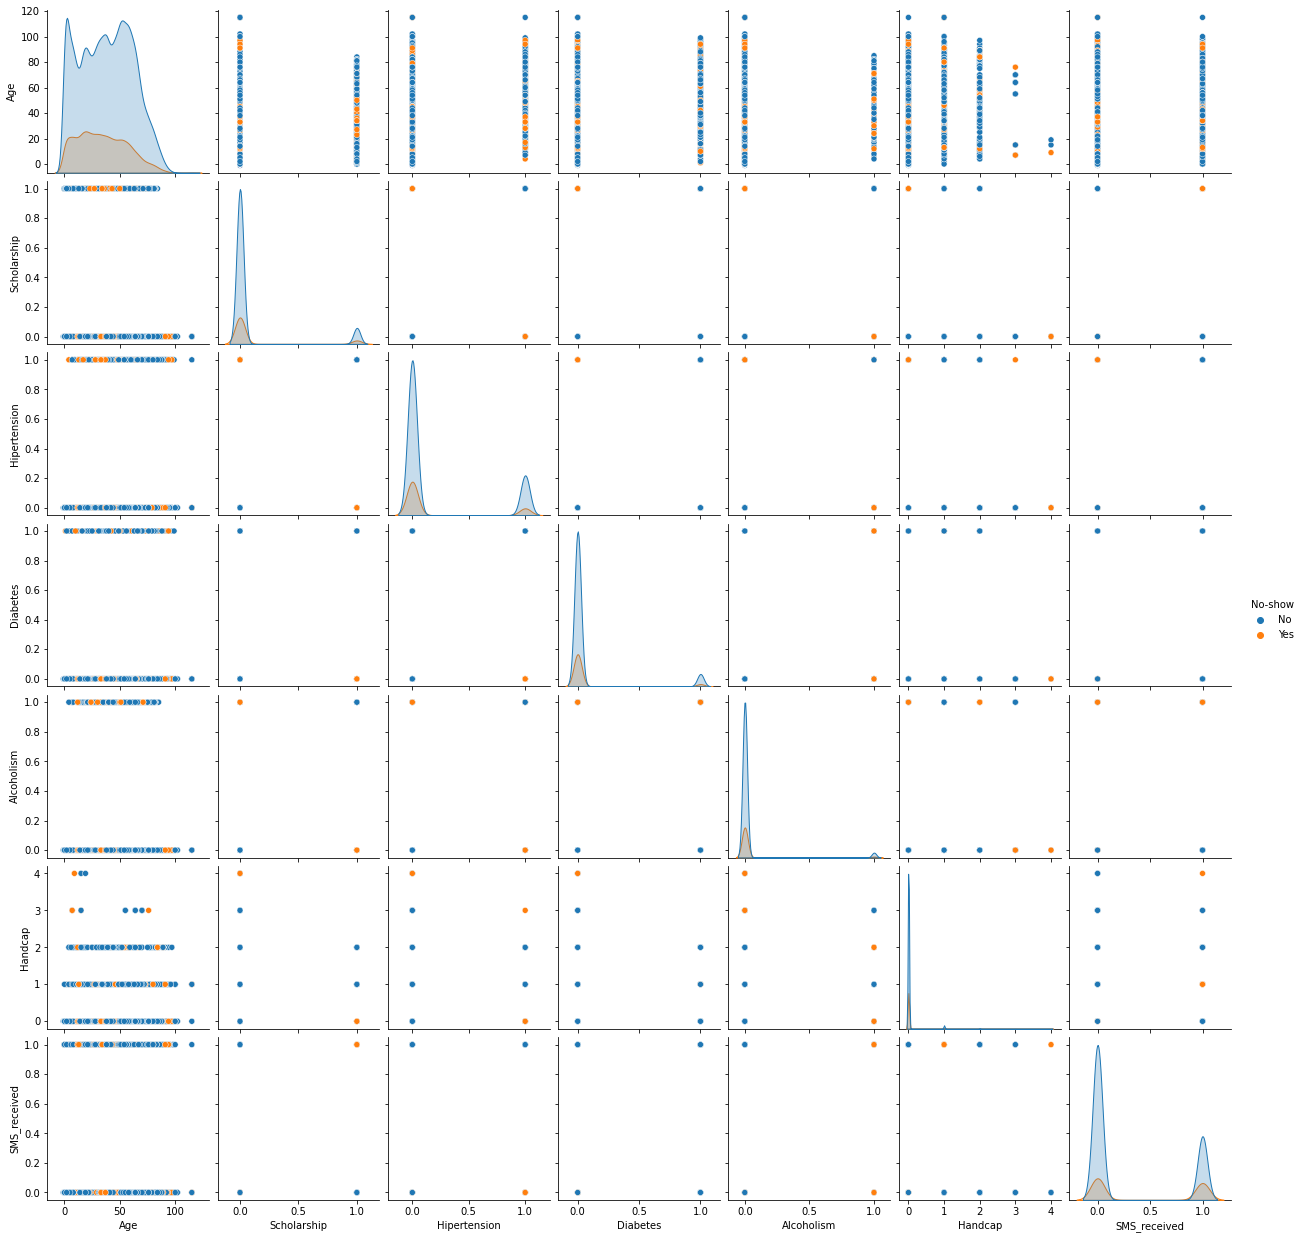

In [12]:
# Let's remove the PatientId and AppointmentId columns, to reduce unnecessary computations
cols = [col for col in no_show.columns.tolist() if col not in ['PatientId', 'AppointmentID']]
# We plot the dataset (minus the ID columns) with 'No-show' as the hue
sns.pairplot(no_show[cols], hue='No-show')

### Preliminary takeaways:
#### - People that are aged (roughly) 60 or younger seem to have a higher no-show rate than older people.
#### - Weirdly, having received an SMS regarding your appointment seems to lead to higher no-show rates.
#### - I am unable to draw insights from the other (numeric) features using this plot.

### It is important to note that only numeric features were plotted, since Seaborn ignored the non-numeric features, we'll have to explore those some other way, let's take note of them for now:
#### - Gender: categorical (binary)
#### - ScheduledDay: datetime (need casting from str)
#### - AppointmentDay: datetime (need casting from str)
#### - Neighbourhood: categorical (multiclass)
#### - No-show: categorical (binary)

### Let's handle those one at a time:
#### - No-show: we could categorically encode them so we'd be able to compute summary statistics from it.
#### - Gender: we could visualize and compute summary statistics for that column.
#### - ScheduledDay, AppointmentDay: convert to datetime and compute the duration between scheduling and appointment.
#### - Neighbourhood: we could groupby neighborhoods and attempt drawing insights from the grouped data.

### Let's see

In [90]:
# No-show: categorical encoding
# We use the Pandas 'get_dummies' function to encode the values, specifying 'drop_first' as True to have only 1 column
no_show['No-show'] = pd.get_dummies(no_show['No-show'], drop_first=True)
# We print the head to confirm our transformation
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SchAppDuration
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


Sum:
 Gender
F    14594.0
M     7725.0
Name: No-show, dtype: float64 

Mean:
 Gender
F    0.203146
M    0.199679
Name: No-show, dtype: float64


<AxesSubplot:xlabel='Gender', ylabel='Count'>

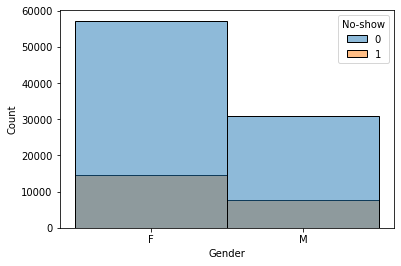

In [46]:
# Gender: summary statistics and visualization
# We use the DF's 'groupby' function to calculate the sum and mean of no-shows
gender_grouped = no_show.groupby('Gender')
# Sum of no-shows by gender
print('Sum:\n', gender_grouped.sum()['No-show'], '\n')
# Mean of no-shows by gender
print('Mean:\n', gender_grouped.mean()['No-show'])
sns.histplot(data=no_show, x='Gender', hue='No-show')

### Insights:
#### - Here while we see a greater number of no-shows from females, we must put into account that a greater number of females schedules appointments in the first place.
#### - As we can see the mean of no-shows by males and females are very close.
#### - Therefore, we can assume that gender is irrelevant to no-shows.

### Next, let's take a look at ScheduledDay, AppointmentDay

In [47]:
# We use the Pandas function 'to_datetime' to convert both columns to datetime
no_show['ScheduledDay'] = pd.to_datetime(no_show['ScheduledDay'])
no_show['AppointmentDay'] = pd.to_datetime(no_show['AppointmentDay'])
# We confirm our transformation by checking the types
print(no_show.dtypes)
# We also make sure we broke nothing in the process by taking a look at the head of the DF
print(no_show.head())

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                         uint8
dtype: object
      PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood

In [60]:
# We calculate the number of days between scheduling date and the appointment date
# and store the result in a new column: 'SchAppDuration'
from datetime import datetime as dt
# But since some of the values in the 'ScheduledDay' column have time in them, while the 'AppointmentDay' values
# in the same row may not have a value for time, this could create negative values where 0 would've been the correct value
# therefore we first extract only the date by using the 'date' function in the datetime module by applying it to the DFs
appointment_date = no_show['AppointmentDay'].apply(dt.date)
scheduled_date = no_show['ScheduledDay'].apply(dt.date)
# And since their delta would return a 'timedelta' object while we'd like an integer, we extract the days attribute
as_int = lambda x: x.days
# Putting it all together
no_show['SchAppDuration'] = (appointment_date - scheduled_date).apply(as_int)
# Checking the head to make sure the transformation was successful
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SchAppDuration
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


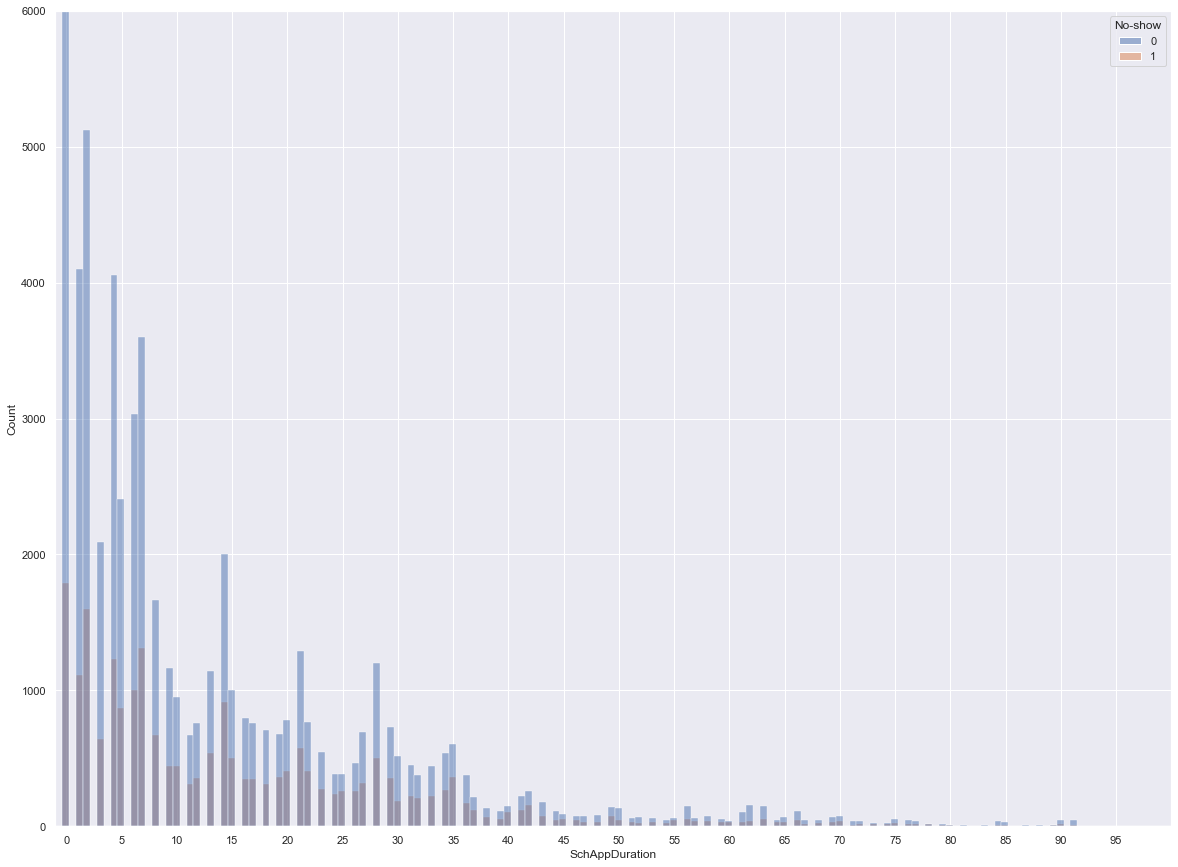

Same day appointments' no-shows, sum: 1792 mean: 0.0464694136866945
Next day appointments' no-shows, sum: 1113 mean: 0.21350469978898906
Not-same-day appointments' no-shows, sum: 20522 mean: 0.285190177740102


In [89]:
# Let's take a look at a historgram for this new column we created
p = sns.histplot(data=no_show, x='SchAppDuration', hue='No-show')
#plt.show()
# It's a bit hard to see, let's ignore most of the same-day no-shows and set the limit to 100 days
p.set(ylim=(0,6000))
p.set(xlim=(-1,100))
# Let's also set xticks to a cycle of every 5 days so we'd be able to confidently assume which bin belongs to which X value
p.set(xticks=range(0, 100, 5))
plt.show()
# It seems that while the 'same day appointments' have the highest number of no-shows, it has a much greater
# number of values overall, let's take a look at the summary statistics to confirm this hunch
# First let's extract DFs for same day and next day appointments
# as well as group the appointments that are not on the same day as the scheduling day
same_day = no_show[no_show['SchAppDuration'] == 0]
next_day = no_show[no_show['SchAppDuration'] == 1]
one_or_more = no_show[no_show['SchAppDuration'] > 0]
print("Same day appointments' no-shows, sum:", same_day['No-show'].sum(), 'mean:', same_day['No-show'].mean())
print("Next day appointments' no-shows, sum:", next_day['No-show'].sum(), 'mean:', next_day['No-show'].mean())
print("Not-same-day appointments' no-shows, sum:", one_or_more['No-show'].sum(), 'mean:', one_or_more['No-show'].mean())



### Insights:
#### - It seems that appointments that are on the same day of the scheduling have the lowest no-show rate of less than 5%.
#### - While appointments that take place on a day other than the scheduling day have 28.5% no-show rate.
#### - Therefore we can confidently assume that the duration between the scheduling and the appointment is a paramount factor in no-show decisions.

### Next, let's take a look at the relevance of neighborhoods to no-shows

Number of neighborhoods: 81
         Neighbourhood    Sum      Mean
0            AEROPORTO    1.0  0.125000
1           ANDORINHAS  521.0  0.230327
2      ANTÔNIO HONÓRIO   50.0  0.184502
3  ARIOVALDO FAVALESSA   62.0  0.219858
4       BARRO VERMELHO   91.0  0.215130


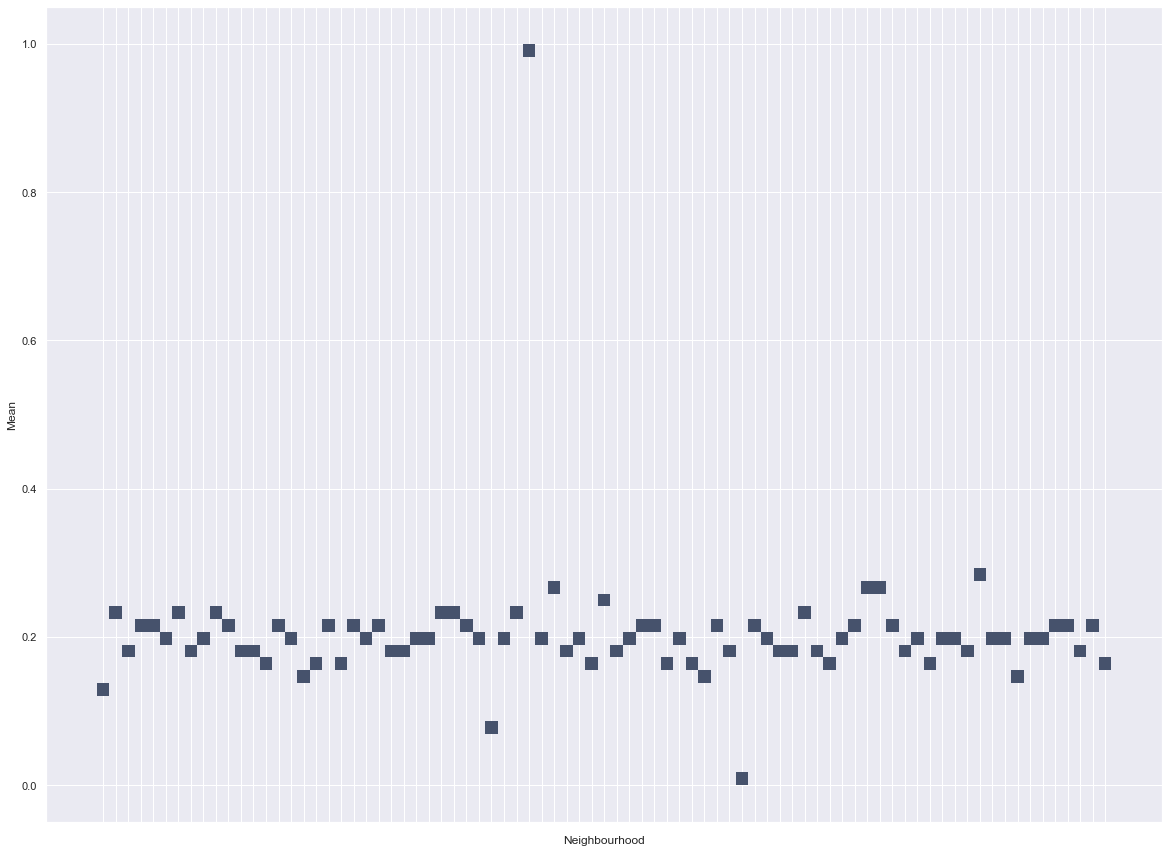

In [170]:
# Let's look at how many neighborhoods we have
print('Number of neighborhoods:', len(no_show['Neighbourhood'].value_counts()))
# Let's group by neighborhoods then calculate summary statistics
neighbourhood_grouped = no_show.groupby('Neighbourhood')
# Let's calculate the sum and mean per neighborhood
# But first let's create an index so we'd ensure that when we merge the lists we'd have the rows aligning correctly
ind = neighbourhood_grouped['No-show'].sum().index
neighbourhood_sum = neighbourhood_grouped['No-show'].sum()[ind].tolist()
neighbourhood_mean = neighbourhood_grouped['No-show'].mean()[ind].tolist()
# We merge the lists into a DF
neighbourhood_stats = pd.DataFrame({'Neighbourhood':ind.tolist(),'Sum':neighbourhood_sum,'Mean':neighbourhood_mean})
# We check the head to make sure everything is ok
print(neighbourhood_stats.head())
# Now let's plot a histogram of the means to see if we can spot any abnormalities
p = sns.histplot(data=neighbourhood_stats, x='Neighbourhood', y='Mean')
# But first, since we have 81 neighborhoods, let's remove the X axis labels, to make the graph cleaner
p.set(xticklabels=[])
plt.show()

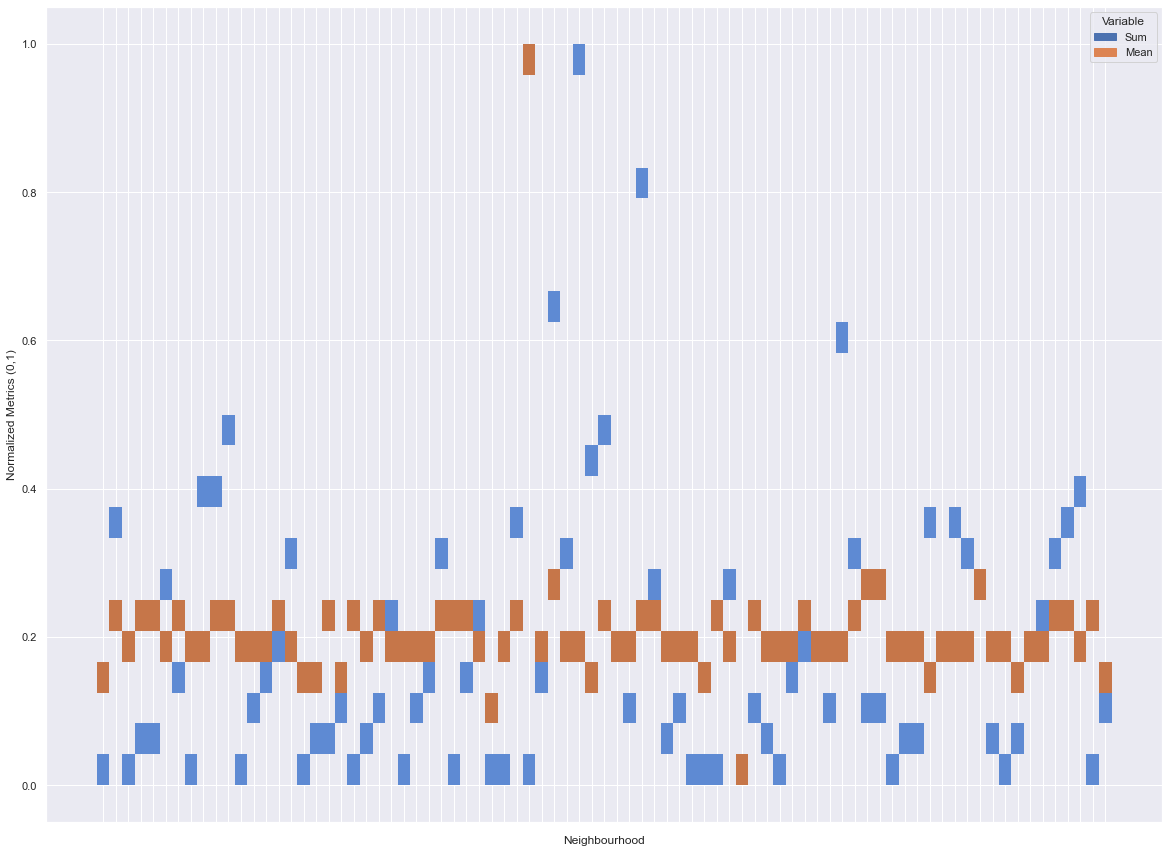

In [246]:
# Let's visualize the sum next to the mean, to make sure we have no heavy-weight outliers
# But first we have to normalize the 'Sum' to be between 0 and 1
# We make a copy as not to alter the original values
tmp = neighbourhood_stats.copy()
# We normalize by subtracting the minimum and dividing by the range
n_min = min(neighbourhood_ss['Sum'])
n_max = max(neighbourhood_ss['Sum'])
n_range = n_max - n_min
tmp['Sum'] = (neighbourhood_ss['Sum'] - n_min) / n_range
# We melt to tmp DF to plot both columns on the same graph
melted_df = tmp.melt(id_vars='Neighbourhood').rename(columns=str.title)
# Finally, let's plot a histogram and take a look
p = sns.histplot(data=melted_df, x='Neighbourhood', y='Value', hue='Variable')
p.set(xticklabels=[], ylabel='Normalized Metrics (0,1)')
plt.show()

### Insights:
#### - We can clearly see that, except for 1 neighbourhood (or 3, depending on your threshold) the mean seems to be uniformally distributed.
#### - We can also see that none of the outliers is heavy-weight (has a high count of no-shows).
#### - Therefore we can confidently assume that the neighbourhood feature is irrelevant to no-shows.

### Let's go back to our preliminary findings from the pair plot we created initially:
#### - Age: do non-eldery people have a higher no-show rate?
#### - SMS_received: does receiving an SMS about your appointment lead to a higher no-show rate?

### Time to dive deeper

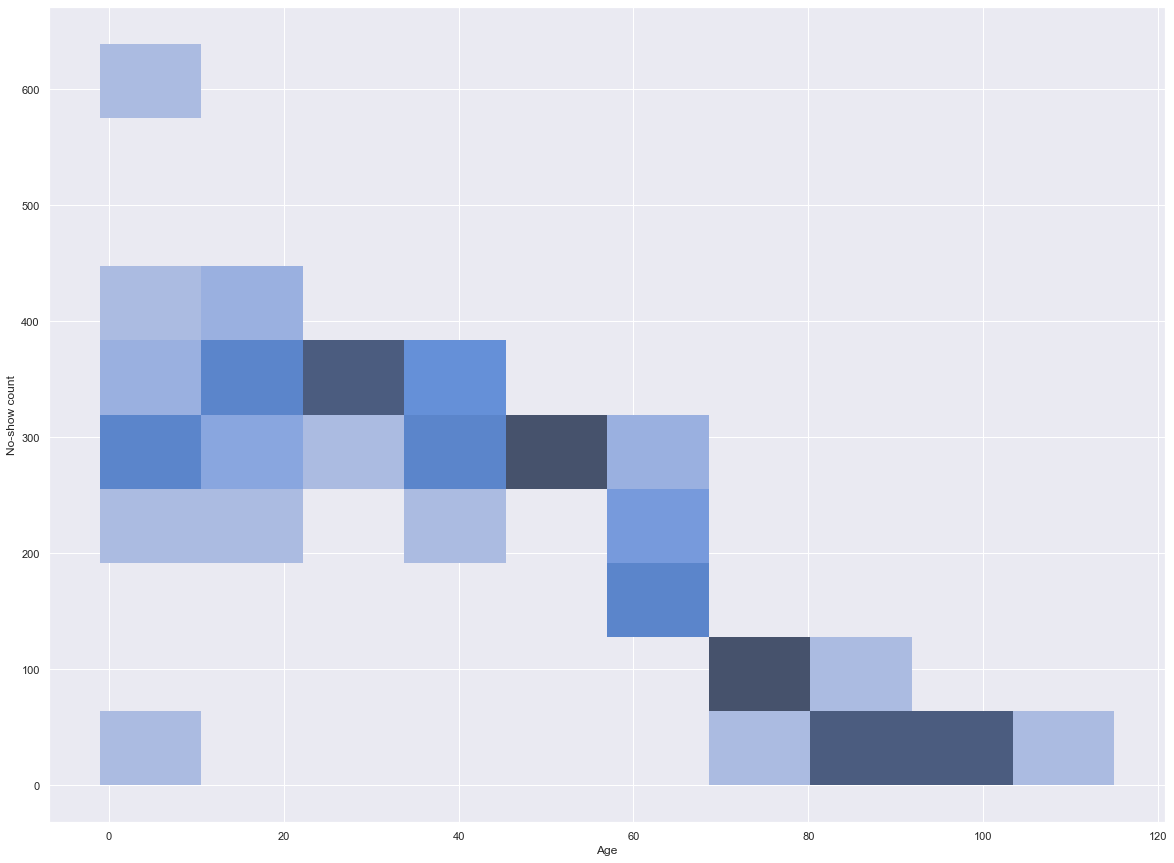

In [250]:
# First, let's look at age, let's group the no-shows by 'Age'
age_grouped = no_show.groupby('Age')['No-show']
# Time to create summary statistics
age_sum = age_grouped.sum()
age_mean = age_grouped.mean()
# Let's create a histogram and take a look at it
p = sns.histplot(data=age_sum.to_frame(), x='Age', y='No-show', bins=10)
p.set(ylabel='No-show count')
plt.show()
# Ok we can see a somewhat sharply decreasing number of no-shows as people age

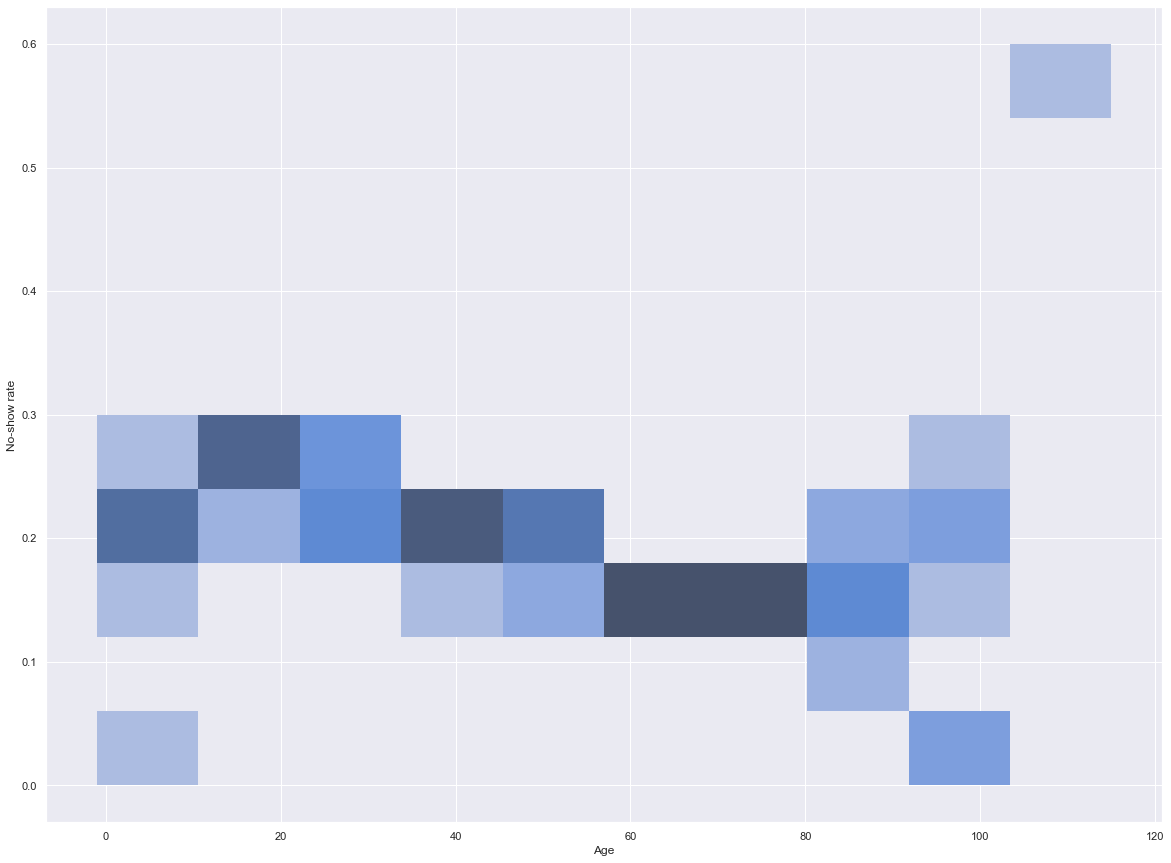

In [261]:
# What about the rate of no-shows instead of the absolute values
p = sns.histplot(data=age_mean.to_frame(), x='Age', y='No-show', bins=10)
p.set(ylabel='No-show rate')
plt.show()
# We can still see the same trend, albeit more moderately

### Insights:
#### - As people age they seem less likely to ditch their appointments.
#### - Elderly people seem to have overall fewer appointments.

### But what about SMS messages?

SMS_received
0    12535.0
1     9784.0
Name: No-show, dtype: float64 SMS_received
0    0.167033
1    0.275745
Name: No-show, dtype: float64


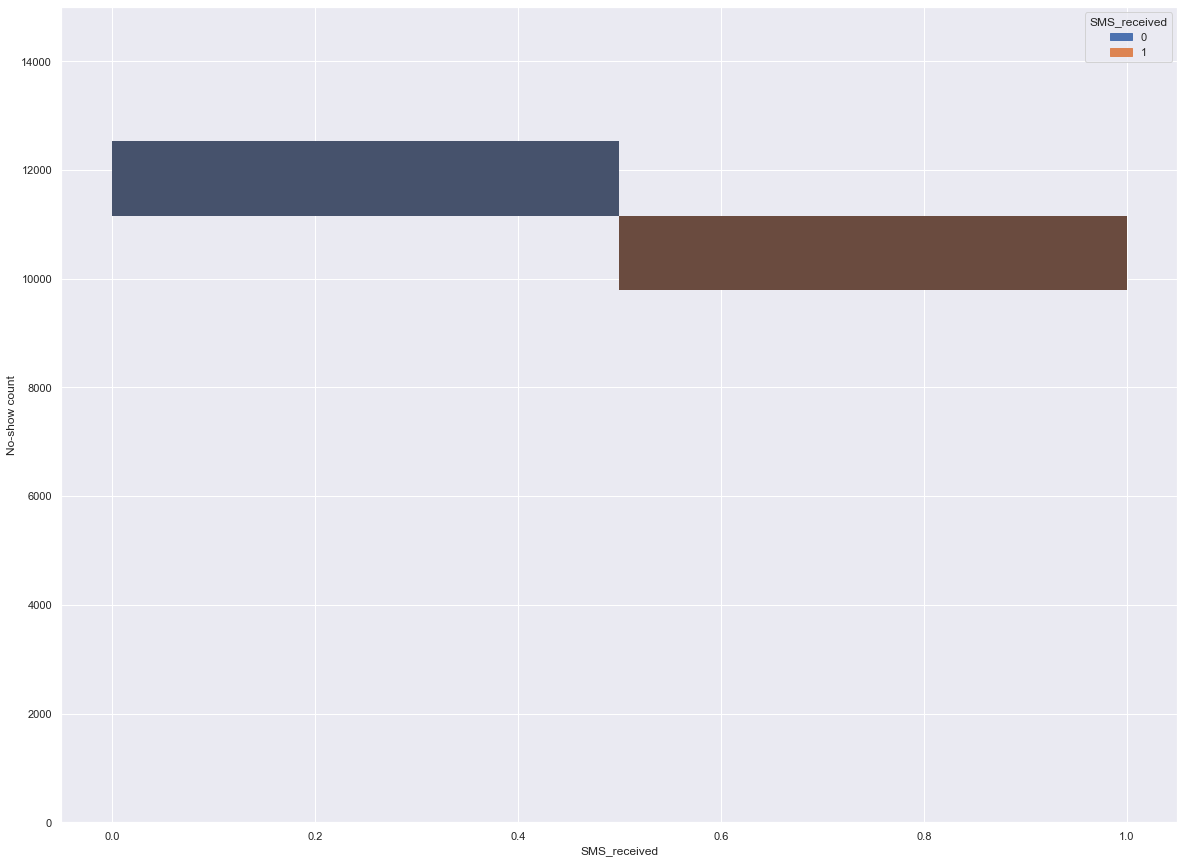

In [285]:
# Let's group no-shows by 'SMS_received'
sms_grouped = no_show.groupby('SMS_received')['No-show']
# Let's compute and take a look at the summary statistics
sms_sum = sms_grouped.sum()
sms_mean = sms_grouped.mean()
print(sms_sum, sms_mean)
# Now, it's time to create a histogram
p = sns.histplot(data=sms_sum.to_frame(), x='SMS_received', y='No-show', hue='SMS_received')
p.set(ylim=(0,15000), ylabel='No-show count')
plt.show()
# It looks like more of the people that didn't receive a text messages missed their appointments
# But that doesn't match the mean values we saw, let's plot those

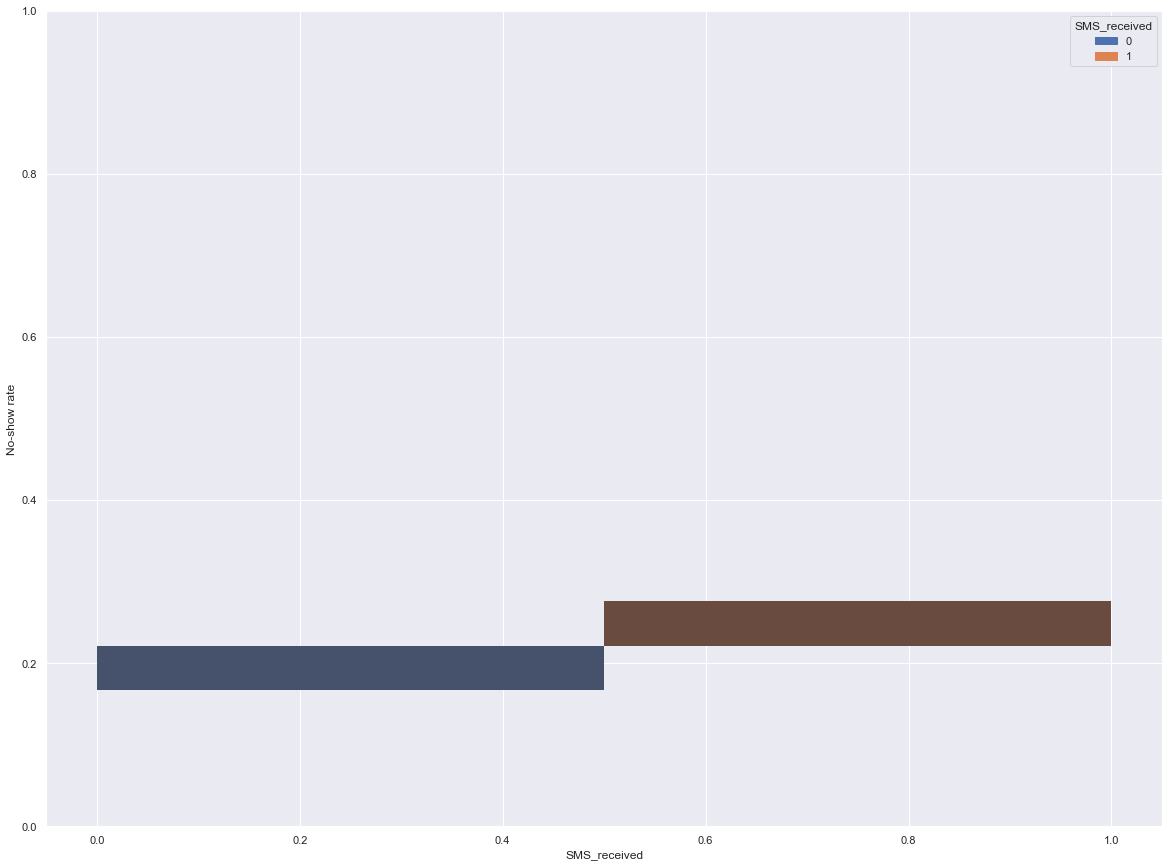

In [279]:
# Plotting a histogram of the mean values looks like this
p = sns.histplot(data=sms_mean.to_frame(), x='SMS_received', y='No-show', hue='SMS_received')
p.set(ylim=(0,1), ylabel='No-show rate')
plt.show()
# Here we can see it's actually the other way around

### Insights:
#### - It seems that people that receive SMS messages regarding their appointments are more likely to miss it.

### Wait a second, what about recurrence? Patients that _repeatedly_ miss their appointments?
### Luckily, since we have patient IDs we can explore this notion further

Number of unique patients: 48228
Number of patients that have missed one or more appointments: 17663
Number of patients that never missed an appointment: 44636
Number of patients that missed more than one appointment: 3226
             0
No-show       
0        44636
1        14437
2         2418
3          516
4          162
5           58
6           33
7           13
8            9
11           4
10           4
9            3
12           1
13           1
14           1
15           1
16           1
18           1


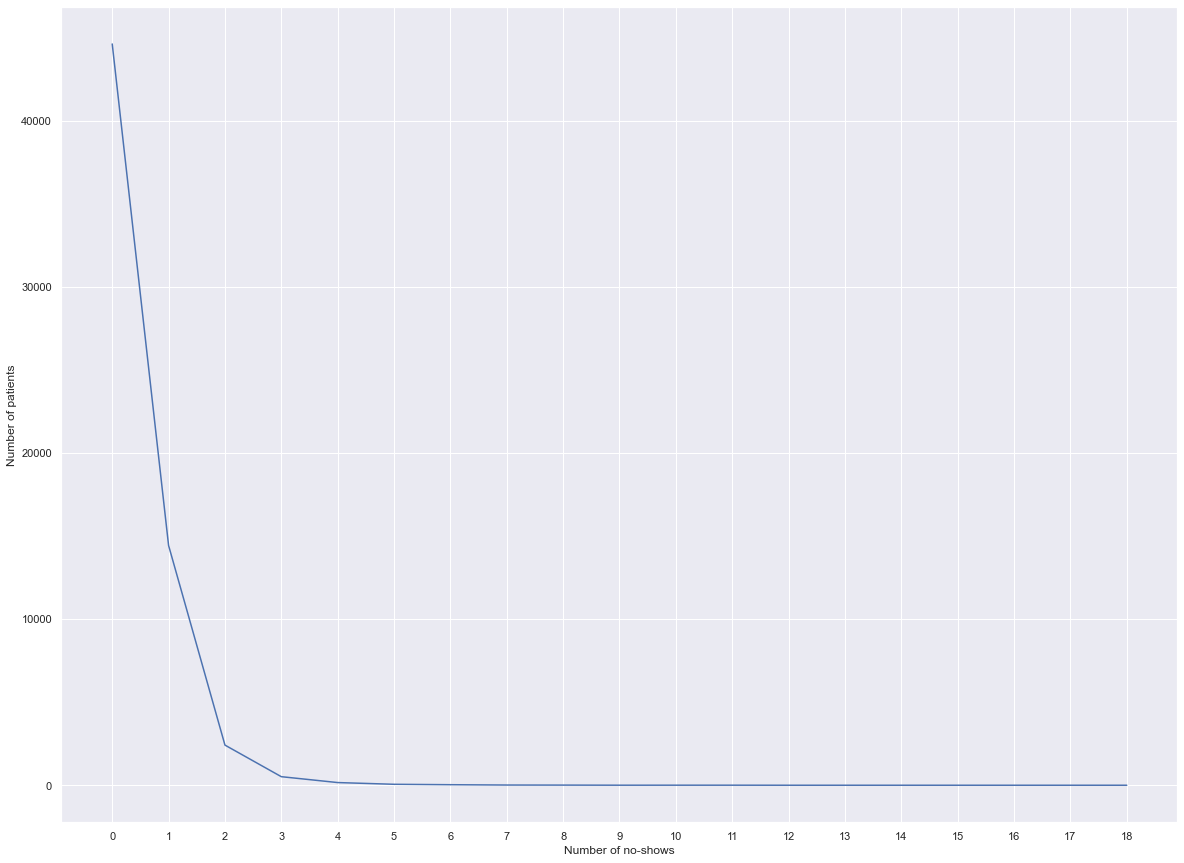

In [324]:
# First, let's make sure that recurring patients do exist in the data
print('Number of unique patients:', no_show['PatientId'].duplicated().sum())
# Ok, we do have recurring patients, let's group by patients
patient_grouped = no_show.groupby('PatientId')['No-show']
# Let's take a look at summary statistics
patient_sum = patient_grouped.sum()
patient_mean = patient_grouped.mean()
# How many patients miss their appointments?
print('Number of patients that have missed one or more appointments:', \
      patient_sum.to_frame()[patient_sum.to_frame()['No-show']>0].count()[0])
print('Number of patients that never missed an appointment:', \
      patient_sum.to_frame()[patient_sum.to_frame()['No-show']==0].count()[0])
# Do many patients miss more than 1 appointment?
print('Number of patients that missed more than one appointment:', \
     patient_sum.to_frame()[patient_sum.to_frame()['No-show']>1].count()[0])
# What's their distribution?
patient_missed_dist = patient_sum.to_frame().value_counts().to_frame()
print(patient_missed_dist)
# Hmmmm, nothing seems out of the ordinary here, but just to be sure, let's plot this on a histogram
p = sns.lineplot(data=patient_missed_dist, x='No-show', y=0)
p.set(ylabel='Number of patients', xlabel='Number of no-shows', xticks=list(range(19)));

# Insights:
#### - As we predicted earlier, no, Brazil doesn't seem to have a problem with 'serial ditchers'

### Another idea I'm having is whether the time of year has any effect on no-shows; shall we?

In [335]:
# First, we have to create a new column, 'Season', and give it a value based on the season during the appointment
# Let's create a dict for reference
seasons = {
    9: 'spring',
    10: 'spring',
    11: 'spring',
    12: 'summer',
    1: 'summer',
    2: 'summer',
    3: 'autumn',
    4: 'autumn',
    5: 'autumn',
    6: 'winter',
    7: 'winter',
    8: 'winter'
}
# Let's create the column
no_show['Season'] = no_show['AppointmentDay'].apply(lambda x: seasons[x.month])
# Time to make sure we broke nothing
no_show.head()
# Looks good

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SchAppDuration,Season
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,autumn
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,autumn
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,autumn
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,autumn
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,autumn


In [342]:
# Now, let's group by this new column 'Season' and check if we can see any patterns
season_grouped = no_show.groupby('Season')['No-show']
print(season_grouped.sum())
print(season_grouped.mean())
# Everything seems normal here, but wait, why do we have only 2 seasons (autumn and winter)
# and why is the number of appointments in winter a fraction of the number of autumn appointments

Season
autumn    17437.0
winter     4882.0
Name: No-show, dtype: float64
Season
autumn    0.207396
winter    0.184568
Name: No-show, dtype: float64


In [344]:
# We create a temporary DF with the months' numbers for a sanity check
tmp = no_show['AppointmentDay'].apply(lambda x: x.month)
print(tmp.value_counts())
# It seems that the samples were taken for a duration of 3 months only (April through June)
# which explains why the other 2 seasons are non-existent as well as why winter has such
# a low number of appointments

5    80841
6    26451
4     3235
Name: AppointmentDay, dtype: int64


### Insights:
#### - Since the data was collected over the duration of 3 months only, we can't draw conclusions on the hunch we had earlier and are forced to abandon it

## Conclusions:
#### - Interval between scheduling date and appointment date seems to yield the strongest correlation to no-shows.
#### - Age and whether the patient receives a text message seem to have a positive, if a bit weak, correlation to no-shows.
#### - Other factors seem to have a very weak to no correlation with no-shows.

#### _*Important reminder that correlation does not imply causation.*_


## Analyzed by your friendly neighborhood software engineer/data analyst: Nour A. Talaat